# MODULO 4: DESARROLLO DE UN MODELO
### Autor: Guillermo Alfonso Muñiz Hermosillo
### Matricula: A01793101
### Curso: Ciencia y Analitica de Datos
<h1><center>PROGRESO DEL CURSO:</center></h1>
<img src='./imagenes/A01793101_ProgresoMod4.png'>

<h1><center>GRADED REVIEW QUESTIONS:</center></h1>
<img src='./imagenes/A01793101_GradedReviewQuestionsMod4.png'>

## QUE ES UN MODELO?

Un modelo se puede definir como una ecuacion matematica que usamos para predecir uno o mas valores determinado.

Relacionar uno o mas variables independientes a otras dependientes

**Mientras mas relevante sea nuestra informacion, mejor sera el modelo**

## REGRESION LINEAL SIMPLE

Se refiere a una variable independiente capaz de hacer una prediccion. Este metodo nos ayuda a comprender la relacion entre 2 variables:

- El predictor X (independiente)
- El objetivo y (dependiente)

y = b0 + b1X

    - b0: La intercepcion
    - b1: La pendiente

In [3]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


df = pd.read_csv('Cars.csv')

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0,13.055556


Si asumimos que existe una relacion linear entre 2 variables podemos usar esta relacion para formular un modelo que determine nuestra prediccion de dicha relacion. 

Para determinar la linea de la recta, tomamos los puntos de datos de nuestro conjunto de datos como parametros. La variable que queremos predecir es usualmente llamada el objetivo yse almacena en un dataframe en el cual cada muestra corresponde a una fila de datos de otro arreglo con los puntos de informacion X.


El ruido es un valor agregado a nuestros datos para añadir cierta incertidumbre presente en la obtencion del valor objetivo.

El proceso final se resume asi:

- Tenemos un conjunto de datos de entrenamiento, los cuales usamos para entrenar el morelo y obtener parametros.
- Despues usamos estos parametros en el modelo.
- Con el model completado, realizamos una prediccion o estimacion de nuestra variable de salida para valores que no hayamos observado.


In [11]:
# 1-  Importamos la libreria LinearRegression de Scikit-learn
from sklearn.linear_model import LinearRegression
# 2- Creamos un objeto de regresion lineal usando el constructor
lm = LinearRegression()
# 3 Definimos la variable predictora y el objetivo.
X = df[['highway-mpg']]
y = df[['price']]
# 4- Usamos el metodo fit de nuestro modelo (lm) para encontrar los parametros b0 y b1
lm.fit(X,y)
# 5- Obtenemos una prediccion usando el metodo predict de nuestro modelo
yhat = lm.predict(X)

# La salida tiene el mismo numero de datos que la muestra de datos X.
yhat[0:5]


array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [7]:
# Podemos observar el atributo b0:
print(lm.intercept_)
# Tambien el atributo b1
print(lm.coef_)

[38423.30585816]
[[-821.73337832]]


**La relacion entre el precio y el Millaje por galon en carretera se define con la siguiente ecuacion:**

Price = 38423.30585816 - 821.73 * highway-mpg

  Yhat  =       b0      +  b1   *      X

## REGRESION LINEAR MULTIPLE (MLR)

Usamos la regresion lineal multiple para explicar la relacion entre una variable continua llamada objetivo (Y) y 2 o mas variables predictoras (X)

Por lo que si por ejemplo tuvieramos 3 variables predictoras:

Y_hat = b0 + b1X1 + b2X2 + b3X3

Donde:

    - b0 = Intercepcion (X = 0)
    - b1 = El coeficiente o parametro de X1
    - b2 = El coeficiente o parametro de X2
    - b3 = El coeficiente o parametro de X3

In [16]:
# 1.- Extraemos nuestras variables predictoras (X)
test = df[['horse-power', 'curb-weight', 'engine-size', 'highway-mpg']]
# 2.- Entrenamos el modelo con estas variables usando el metodo fit.
lm.fit(test, df['price'])
# 3.- Obtenemos nuestra prediccion usando el metodo predict
yhatmlr = lm.predict(test)

yhatmlr[0:5]

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137])

En el caso anterior, la entrada es un dataframe con 4 columnas diferentes.
La salida es un arreglo con el mismo numero de elementos (filas).

La intercepcion es un atributo del objeto asi como los coeficientes.

In [17]:
print(lm.intercept_)
print(lm.coef_)

-15824.03820823447
[53.61042729  4.70886444 81.47225667 36.39637823]


Por lo tanto la formula para este modelo seria:

Price = -15824.03820823447 + (53.61042729 * horse-power) + (4.70886444 * curb-weight + (81.47225667 * engine-size) + (36.39637823 * highway-mpg))

Y_hat = b0 + b1X1 + b2X2 + b3X3

## Evaluacion de modelos utilizando Visualizacion

Graficos de regresion son buenos para observar

- La relacion entre 2 variables.
- La fuerza de la correlacion entre ellas.
- La direccion de dicha relacion (positiva o negativa)

(0.0, 48169.62263031104)

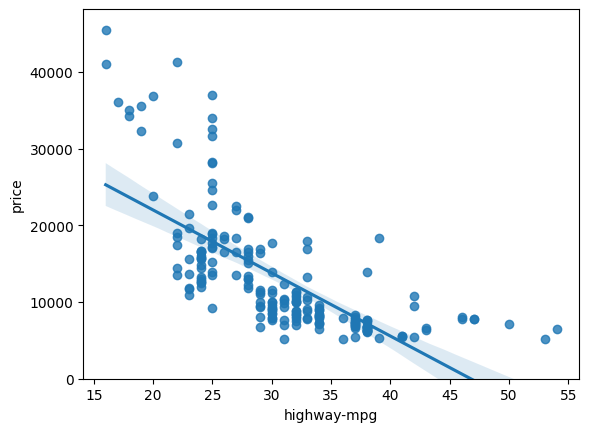

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

El grafico resultante representa el error entre los valores verdaderos y los valores predichos.

Esperamos que los resultados tengan una media de 0, distribuidos equitativamente alrededor del eje X on una varianza similar y sin curvatura.

Para poder observar si nuestro modelo es adecuado para una regresion lineal. Podemos utilizar un grafico residual.

<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

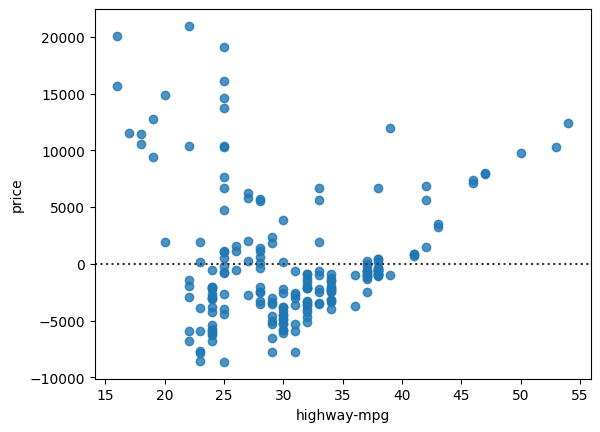

In [21]:
sns.residplot(x=df['highway-mpg'], y=df['price'])

### Graficos de Distribucion e Histogramas 
Los graficos de distribucion cuentan el valor predicho contra el valor verdadero. 
Estos graficos son utiles para visualizar modelos con mas de una variable independiente o caracteristica.

Los Histogramas se usa para variables discretas, por lo que pandas los convertira en una distribucion. El eje vertical se escala para hacer que el area bajo la distribucion sea igual a uno.

<AxesSubplot: xlabel='price', ylabel='Density'>

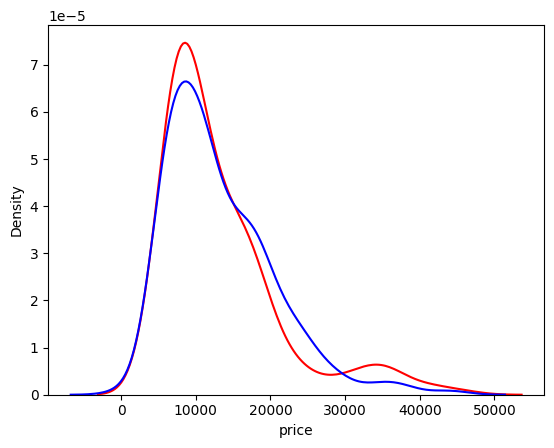

In [30]:
ax1 = sns.kdeplot(df['price'], color='r', label='Actual Value')

sns.kdeplot(yhatmlr, color='b', label='Fitted Values', ax=ax1)

## REGRESION POLINOMIAL Y PIPELINES

Cuando un modelo lineal no es la mejor opcion para nuestros datos podemos transformar nuestros datos en un polinomio y despues usar la regresion lineal para ajustar el parametro.

Este meodo es beneficioso para describir relaciones curvas, es decir aquella que se obtiene al elevar al cuadrado o mayor orden los terminos de la variable predictora.

Pipelines por su parte son una maneria de simplificar nuestro codigo. Estas nos ayudan a alicar secuencialmente una serie de transformaciones, el ultimo paso es la prediccion


In [33]:
# Usamos la funcion Polyfit de tercer orden
f = np.polyfit(df['highway-mpg'], df['price'], 3)
p = np.poly1d(f)

# imprimimos el modelo
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Podemos utilizar la libreria de preprocesamiento de sci-kit learning para crear un objeto para caracteristicas polinomiales como parametro

In [34]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2, include_bias=False)

Despues, transformamos las caracteristicas en un polinomio usando el metodo fit_transform

In [35]:
x_polly = pr.fit_transform(df[['horse-power', 'curb-weight']])
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

Mientras que la dimension de nuestros datos puede volverse muy grande debemos de normalizar las multiples caracteristicas, esto lo podemos hacer utilizando la libreria scikit learn.

Por ejemplo, podemos estandarizar cada caracteristica simultaneamente usando un Escalador Estandar

In [37]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()
SCALE.fit(df[['horse-power', 'curb-weight']])

x_scale = SCALE.transform(df[['horse-power', 'curb-weight']])
x_scale[0:5]

array([[ 0.20398438, -0.01485764],
       [ 0.20398438, -0.01485764],
       [ 1.35764881,  0.51807951],
       [-0.03748028, -0.42376578],
       [ 0.311302  ,  0.52001746]])

### IMPLEMENTACION DE PIPELINE

In [47]:
# Importamos las librerias/modulos necesarios

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Creamos una lista de tuplas, que contienen el nombre del estimador y el modelo a utilizar

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2), ('model', LinearRegression()))]

# Introducimos la lista en el constructor del Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
pipe = Pipeline(Input)

pipe


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(),
                 ('model', LinearRegression()))])

## MEDIDAS PARA EVALUACION EN MUESTRA

Son una manera de determinar numericamente que tan bien el modelo encaja en nuestro conjunto de datos.

2 de las medidas importantes son:

- Mean Square Error (MSE)
- R Square

### Mean Square Error (MSE)

- Encontramos la diferencia entre el valor real y el valor predicho de nuestra variable Y.
- Despues elevarlo al cuadrado.
- Calculamos la media o promedio de todos los errores en las muestras.

In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], yhat)

31635042.944639888

### R SQUARED (R2)

Es tambien llamado el coeficiente de determinacion. Es la medida que determina que tan cerca los datos estan de la regresion lineal entrenada. Es decir, que tan cerca estan nuestros datos reales de nuestro modelo estimado.


El coeficiente de determinacion tiene la formula de:

1 - MSE de la linea de regresion / MSE del promedio de la informacion.


In [50]:
X1 = df[['highway-mpg']]
Y1 = df['price']

lm.fit(X1, Y1)

lm.score(X1,Y1)

0.4965911884339176

R2 tiene valores entre 0 y 1. 
- Mientras mas cercano a 0, significa que el modelo no se esta desempeñando correctamente.
- Si R2 es negativo, puede ser debido a subentrenamiento en los datos.

## PREDICCIONES Y TOMA DE DECISIONES

Para determinar que nuestro modelo es un buen modelo tenemos que mirar a una combinacion de:

- Los predictores tienen sentido.
- Visualizacion de datos.
- Medidas Numericas para la evaluacion.
- Comparar modelos.

In [65]:
lm.fit(df[['highway-mpg']], df['price'])
df1 = pd.DataFrame({'highway-mpg': [30]})
lm.predict(df1)

array([13771.3045085])

(0.0, 41628.06603361292)

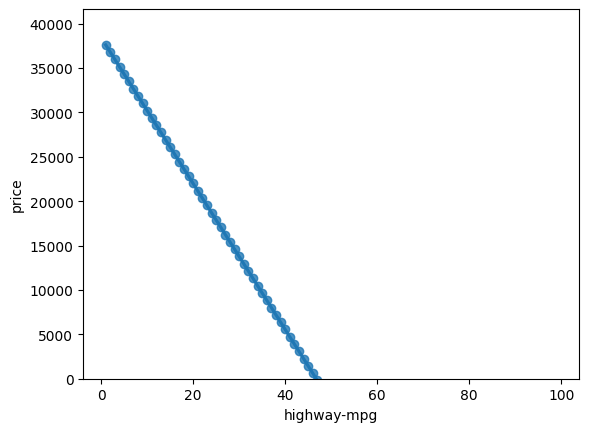

In [82]:
new_input = np.arange(1,100, 1)
df1 = pd.DataFrame({'highway-mpg': new_input})
yhatdum = lm.predict(df1)

df1['price'] = yhatdum
sns.regplot(x=df1['highway-mpg'], y=df1['price'], data=df1)
plt.ylim(0,)

### COMPARANDO MLR Y SLR

- No necesariamente un MLR mas bajo implica un mejor modelo
- MSE para un MLR sera mas pequeño que el MSE para un SLR, dado que los errores en los datos decrementaran mientras haya mas variables incluidas en el modelo.
- Una regresion polinomial tambien tendra un MSE mas pequeño que una regresion regular.
- Una relacion similar existe para R Squared